In [1]:
# In this project we will be using CIFAR10 dataset. This dataset includes thousands of pictures of 10 different kinds of objects
# like airplanes, automobiles, birds and so on. Each image in the dataset includes a matching label so we know
# what kind of image it is. The images in the CIFAR-10 dataset are only 32x32 pixels. These are very low resolution images

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from keras.utils.np_utils import to_categorical

In [2]:
# Load the dataset

(X_train, Y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# Normalize the data

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255.0
X_test/=255.0

In [4]:
# convert class vectors to binary class matrices

Y_train = to_categorical(Y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Dropout - The idea is that between certain layers we will randomly drop/throw away some of the data by cutting
# some of the connections between the layers. this is called as dropout. Usually, we will add dropout right
# after max pooling layer or after a group of dense layers

In [6]:
# Model

model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=(32, 32, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [7]:
# compile the model

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'])

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                        

In [8]:
# Train the model

model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs = 12,
    validation_data = (X_test, y_test),
    shuffle = True
)

Epoch 1/12
1563/1563 [==============================] - 106s 67ms/step - loss: 1.5629 - accuracy: 0.4291 - val_loss: 1.2314 - val_accuracy: 0.5490
Epoch 2/12
1563/1563 [==============================] - 105s 67ms/step - loss: 1.1823 - accuracy: 0.5782 - val_loss: 1.0007 - val_accuracy: 0.6456
Epoch 3/12
1563/1563 [==============================] - 106s 68ms/step - loss: 1.0389 - accuracy: 0.6299 - val_loss: 0.8926 - val_accuracy: 0.6852
Epoch 4/12
1563/1563 [==============================] - 106s 68ms/step - loss: 0.9434 - accuracy: 0.6665 - val_loss: 0.8258 - val_accuracy: 0.7146
Epoch 5/12
1563/1563 [==============================] - 203s 130ms/step - loss: 0.8782 - accuracy: 0.6897 - val_loss: 0.8343 - val_accuracy: 0.7073
Epoch 6/12
1563/1563 [==============================] - 485s 310ms/step - loss: 0.8258 - accuracy: 0.7114 - val_loss: 0.7801 - val_accuracy: 0.7293
Epoch 7/12
1563/1563 [==============================] - 503s 322ms/step - loss: 0.7868 - accuracy: 0.7268 - val_loss

In [10]:
# save the neural network architecture

model_structure = model.to_json()
f=Path("model_structure.json")
f.write_text(model_structure)

4384

In [11]:
# save the trained neural network weights
model.save_weights("model_weights.h5")

In [31]:
# Making predictions on the images

from keras.models import model_from_json
from pathlib import Path
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# CIFAR-10 Dataset class labels

class_labels = [
    "Planes",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

In [22]:
# load the json file that contains the model structure

f = Path("model_structure.json")
model_structure = f.read_text()

In [23]:
# Recreate the keras model object from the json data
model = model_from_json(model_structure)

In [24]:
# Re-Load the model training weights

model.load_weights("model_weights.h5")

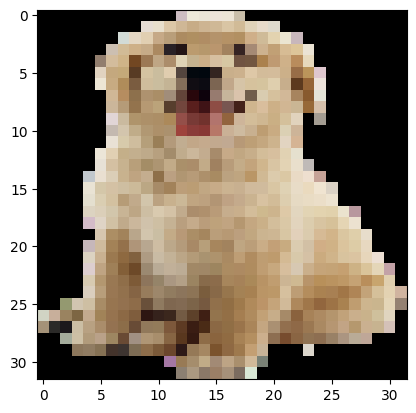

In [32]:
# Load an image file to test

img = image.load_img("dog.png", target_size = (32, 32))
plt.imshow(img)

In [33]:
# Convert the image to a numpy array

image_to_test = image.img_to_array(img)

In [34]:
# Add a fourth dimension to the image, since Keras expects a list of images, not a single image

list_of_images = np.expand_dims(image_to_test, axis = 0)

In [35]:
# make predictions using the model

results = model.predict(list_of_images)

1/1 [==============================] - 2s 2s/step


In [37]:
# since we are only testing one image, we only need to check the first result

single_result = results[0]

In [38]:
# We will get a likelihood for all 10 possible classes. Find out which class has the highest score

most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

In [39]:
# Get the name of the most likely class
class_label = class_labels[most_likely_class_index]

In [40]:
# Print the result

print("This is a image is a {}- Likelihood: {:2f}".format(class_label, class_likelihood))

This is a image is a Horse- Likelihood: 1.000000
